<a href="https://colab.research.google.com/github/Oreoluwa1234/Salary-Prediction-Project/blob/main/Salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the necessary libraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


##Loading the data from the drive

In [74]:
from google.colab import drive

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
drive .mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
survey=pd.read_csv('/content/drive/MyDrive/Anni Thesis Updated/Salary-Prediction-Project-main/survey_results_public.zip')

In [78]:
survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


##Selecting and keeping the columns/features needed for the prediction

In [79]:
survey=survey[['Country','EdLevel','YearsCodePro','Employment','ConvertedComp']]
survey=survey.rename({'ConvertedComp':'Salary'},axis=1)
survey

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN
...,...,...,...,...,...
64456,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Less than 1 year,Employed full-time,NaN
64457,Morocco,NaN,NaN,Employed full-time,NaN
64458,Viet Nam,Primary/elementary school,NaN,NaN,NaN
64459,Poland,NaN,NaN,Employed full-time,NaN


######Droping colmns with Nan salary

In [80]:
survey=survey[survey['Salary'].notnull()]
survey

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0
...,...,...,...,...,...
64142,Nigeria,"Secondary school (e.g. American high school, G...",2,Employed part-time,984.0
64148,Colombia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,19428.0
64152,United States,Some college/university study without earning ...,20,Employed full-time,200.0
64153,Chile,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,Employed full-time,15048.0


###Exploratory Data Analysis

In [81]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [82]:
survey=survey.dropna()
survey.isnull().sum()

,0
Country,0
EdLevel,0
YearsCodePro,0
Employment,0
Salary,0


In [83]:

survey=survey.drop('Employment',axis=1)

In [84]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34025 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34025 non-null  object 
 1   EdLevel       34025 non-null  object 
 2   YearsCodePro  34025 non-null  object 
 3   Salary        34025 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.3+ MB


In [85]:
survey['Country'].value_counts()

,count
Country,
United States,8082
India,2563
United Kingdom,2551
Germany,2206
Canada,1293
...,...
Brunei Darussalam,1
Guinea,1
Burkina Faso,1


In [86]:
def shorten_categories(categories,cutoff):
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]] =categories.index[i]
        else:
             categorical_map[categories.index[i]]='Other'
    return categorical_map


In [87]:
country_map=shorten_categories(survey.Country.value_counts(),400)
survey['Country']=survey['Country'].map(country_map)
survey.Country.value_counts()


,count
Country,
Other,10174
United States,8082
India,2563
United Kingdom,2551
Germany,2206
Canada,1293
Brazil,1139
France,1103
Netherlands,798


<function matplotlib.pyplot.show(close=None, block=None)>

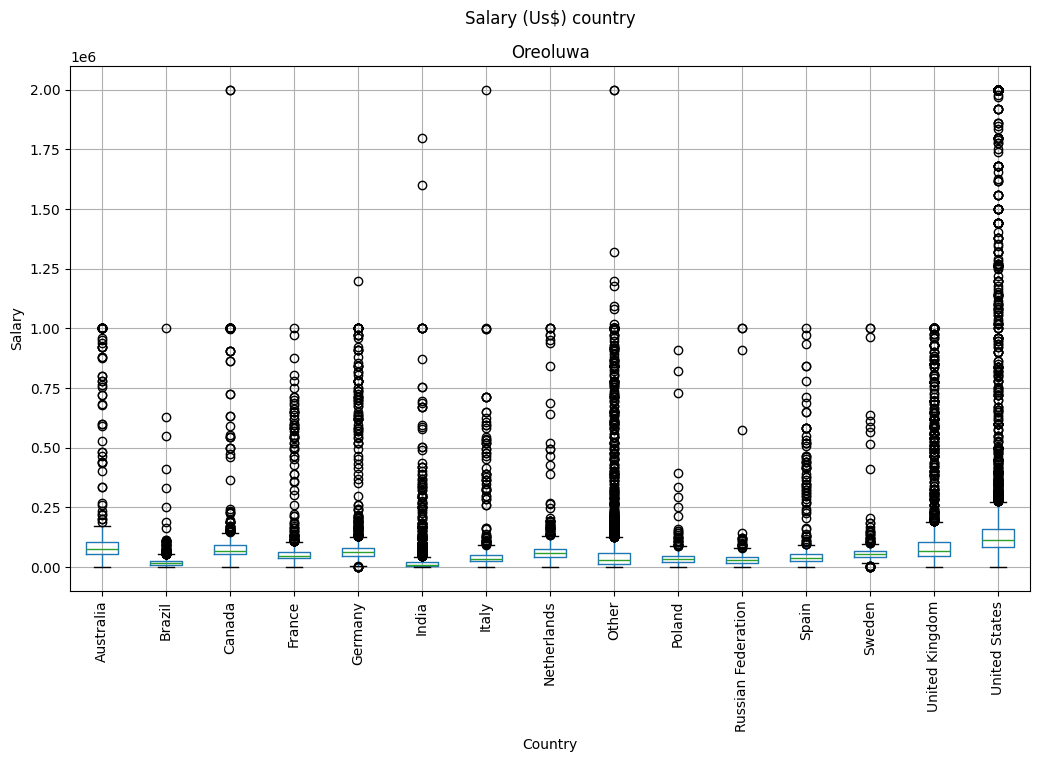

In [88]:
fig, ax=plt.subplots(1,1,figsize=(12,7))
survey.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (Us$) country')
plt.title('Oreoluwa')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show

In [89]:
survey=survey[survey['Salary'] <=250000]
survey=survey[survey['Salary'] >=10000]
survey=survey[survey['Salary'] !='Others']

<function matplotlib.pyplot.show(close=None, block=None)>

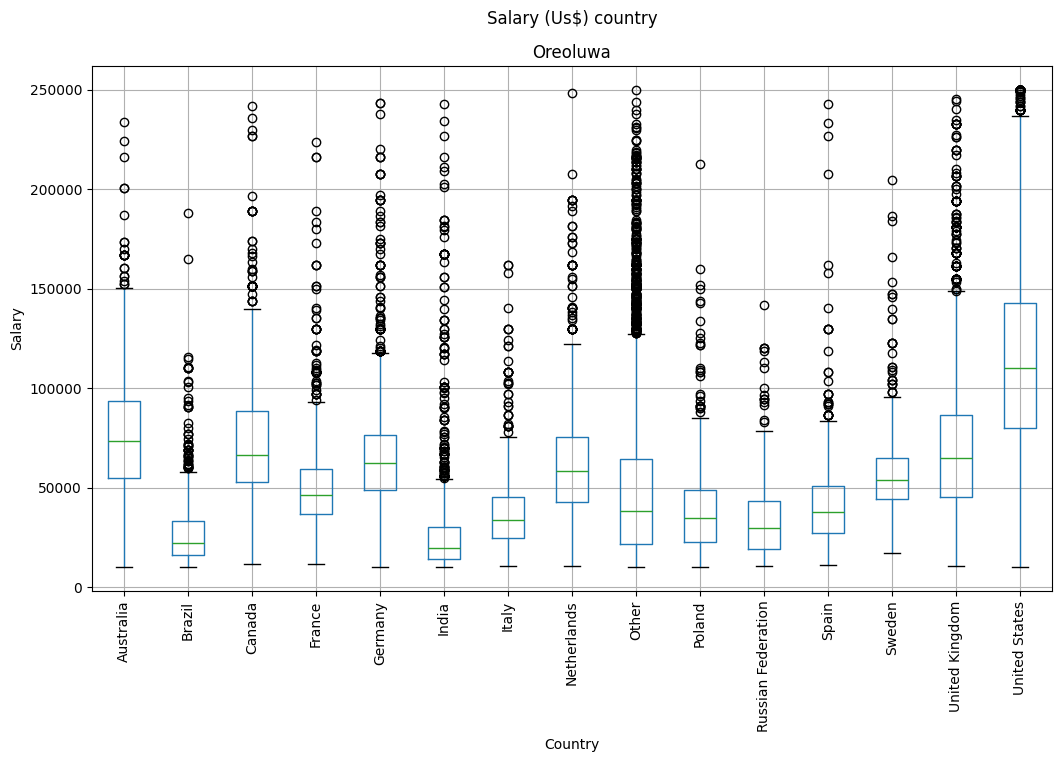

In [90]:
fig, ax=plt.subplots(1,1,figsize=(12,7))
survey.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (Us$) country')
plt.title('Oreoluwa')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show

####Cleaning the YearsCodepro feature

In [91]:
survey['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '23', '3', '10', '14', '12', '29',
       '6', '28', '8', '15', '11', '25', '5', '9', 'Less than 1 year',
       '21', '16', '35', '18', '24', '32', '19', '22', '38', '30', '26',
       '17', '27', 'More than 50 years', '40', '34', '33', '36', '39',
       '37', '31', '41', '45', '50', '42', '43', '44', '48', '46', '49',
       '47'], dtype=object)

In [92]:
def clean_experience(x):
    if x=='More than 50 years':
      return 50
    if x=='Less than 1 year':
      return 0.5
    return float(x)
survey['YearsCodePro']= survey['YearsCodePro'].apply(clean_experience)

In [93]:
survey['YearsCodePro']

,YearsCodePro
7,13.0
9,4.0
10,2.0
11,7.0
12,20.0
...,...
64135,4.0
64141,9.0
64148,5.0
64153,3.0


In [94]:
survey['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [95]:
def clean_education(x):
    if 'Bachelor’s degree'in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree'in x or  'Other doctoral degree' in x:
        return 'Post grad'
    return 'Less than a bachelor'
survey['EdLevel']= survey['EdLevel'].apply(clean_education)



In [96]:
survey['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a bachelor',
       'Post grad'], dtype=object)

In [97]:
from sklearn.preprocessing import LabelEncoder


In [98]:
lb_edlevel=LabelEncoder()
survey['EdLevel']=lb_edlevel.fit_transform(survey['EdLevel'])

In [99]:
survey['EdLevel'].value_counts()

,count
EdLevel,
0,13632
2,7630
1,5910
3,1427


In [100]:
survey['EdLevel'].unique()

array([0, 2, 1, 3])

In [101]:
survey

,Country,EdLevel,YearsCodePro,Salary
7,United States,0,13.0,116000.0
9,United Kingdom,2,4.0,32315.0
10,United Kingdom,0,2.0,40070.0
11,Spain,1,7.0,14268.0
12,Netherlands,1,20.0,38916.0
...,...,...,...,...
64135,Other,0,4.0,38208.0
64141,Germany,2,9.0,129718.0
64148,Other,0,5.0,19428.0
64153,Other,0,3.0,15048.0


In [102]:
lb_country=LabelEncoder()
survey['Country']=lb_country.fit_transform(survey['Country'])

In [103]:
survey['Country'].unique()

array([14, 13, 11,  7,  4,  2,  8,  6,  1,  3, 12,  5,  9,  0, 10])

In [104]:
survey.head()

,Country,EdLevel,YearsCodePro,Salary
7,14,0,13.0,116000.0
9,13,2,4.0,32315.0
10,13,0,2.0,40070.0
11,11,1,7.0,14268.0
12,7,1,20.0,38916.0


#####Data splitting

In [105]:
X=survey.drop('Salary',axis=1)
y=survey['Salary']

In [106]:
X

,Country,EdLevel,YearsCodePro
7,14,0,13.0
9,13,2,4.0
10,13,0,2.0
11,11,1,7.0
12,7,1,20.0
...,...,...,...
64135,8,0,4.0
64141,4,2,9.0
64148,8,0,5.0
64153,8,0,3.0


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [109]:
X

,Country,EdLevel,YearsCodePro
7,14,0,13.0
9,13,2,4.0
10,13,0,2.0
11,11,1,7.0
12,7,1,20.0
...,...,...,...
64135,8,0,4.0
64141,4,2,9.0
64148,8,0,5.0
64153,8,0,3.0


In [110]:
y

,Salary
7,116000.0
9,32315.0
10,40070.0
11,14268.0
12,38916.0
...,...
64135,38208.0
64141,129718.0
64148,19428.0
64153,15048.0


In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
LR=LinearRegression()
train_lr=LR.fit(X_train,y_train)

In [113]:
pred=LR.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
error1=np.sqrt(mean_squared_error(y_test,pred))
print('${:,.02f}'.format(error1))




$39,685.29


In [115]:
from sklearn.tree import DecisionTreeRegressor
Dt=DecisionTreeRegressor(random_state=42)
train_dt=Dt.fit(X_train,y_train)

In [116]:

pred_dt=Dt.predict(X_test)

In [117]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
error3=np.sqrt(mean_squared_error(y_test,pred_dt))
print('${:,.02f}'.format(error3))


$34,227.75


In [118]:
from sklearn.ensemble import RandomForestRegressor
Rf=RandomForestRegressor(random_state=42)
train_rf=Rf.fit(X_train,y_train)


In [119]:
pred_rf=Rf.predict(X_test)

In [120]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
error5=np.sqrt(mean_squared_error(y_test,pred_rf))
print('${:,.02f}'.format(error5))


$33,811.13


In [121]:
from sklearn.model_selection import GridSearchCV
max_depth=[None, 2,4,6,8,10,12]
parameters ={'max_depth':max_depth}
model=RandomForestRegressor(random_state=0)
gs=GridSearchCV(model,parameters,scoring='neg_mean_squared_error')
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [122]:
model=gs.best_estimator_
model.fit(X_train,y_train)
f_pred=model.predict(X_test )
f_error=np.sqrt(mean_squared_error(y_test,f_pred))
print('${:,.02f}'.format(f_error))

$33,153.41


In [123]:
X

,Country,EdLevel,YearsCodePro
7,14,0,13.0
9,13,2,4.0
10,13,0,2.0
11,11,1,7.0
12,7,1,20.0
...,...,...,...
64135,8,0,4.0
64141,4,2,9.0
64148,8,0,5.0
64153,8,0,3.0


###Making a predictive system

In [124]:

Features= np.array([['United States',"Master’s degree",15]])

Features[:,0]=lb_country.transform(Features[:,0])
Features[:,1]=lb_edlevel.transform(Features[:,1])
Features=Features.astype(float)
Features
Prediction=model.predict(Features)
print('${:,.02f}'.format(Prediction[0]))

$140,412.86


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


####Saving the trained model

In [125]:
import pickle

In [126]:
Filename='Saving model.csv'
pickle.dump(model,open(Filename,'wb'))

In [127]:
loaded_model=pickle.load(open('Saving model.csv','rb'))

In [128]:
Features= np.array([['United States',"Master’s degree",15]])

Features[:,0]=lb_country.transform(Features[:,0])
Features[:,1]=lb_edlevel.transform(Features[:,1])
Features=Features.astype(float)
Features
Prediction=loaded_model.predict(Features)
print('${:,.02f}'.format(Prediction[0]))

$140,412.86


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
